In [2]:
import os
import viz_functions
from functools import reduce

In [3]:
base, data, outputs = charts_function_list.folder_setup()
os.chdir(data)

In [38]:
mold_count_explanation = 'Refers to the results of the Howard mold count method which is reported as the percentage of positive microscopic fields that have been scored as either positive or negative based on the presence or absence of a minimum amount of mold hyphae. Performed only on comminuted fruits and vegetables, and some ground spices. The source of the mold hyphae is rotten raw material that is processed along with sound raw material but is no longer visible due to the comminution process.'

In [221]:
fda_of_note_ALL = pd.read_csv('FDA food.csv')

mold = fda_of_note_ALL[fda_of_note_ALL['Defect unit']=='Mold'].sort_values(by='Allowance').reset_index(drop=True)
mold = mold.dropna(axis=1).copy()
#mold['Food'].loc[8] = 'Canned and frozen blackberries/raspberries'
mold.loc[mold['Food'].str.contains('Canned and frozen'),'Food']= 'Canned and frozen blackberries and raspberries'

In [222]:

split_food = mold['Food'].apply(lambda x: x.replace(",","").split())

def line_row(row):
    if len(row)>3:
        return row.insert(3,'\n')
    else:
        return row
    
split_food.apply(lambda x: line_row(x))

new_combined = split_food.apply(lambda z: reduce(lambda x,y: x+" "+y, z))
new_combined = new_combined.str.replace(" \n ","\n")
mold['Food'] = new_combined

In [322]:
mold_count_explanation

'Refers to the results of the Howard mold count method which is reported as the percentage of positive microscopic fields that have been scored as either positive or negative based on the presence or absence of a minimum amount of mold hyphae. Performed only on comminuted fruits and vegetables, and some ground spices. The source of the mold hyphae is rotten raw material that is processed along with sound raw material but is no longer visible due to the comminution process.'

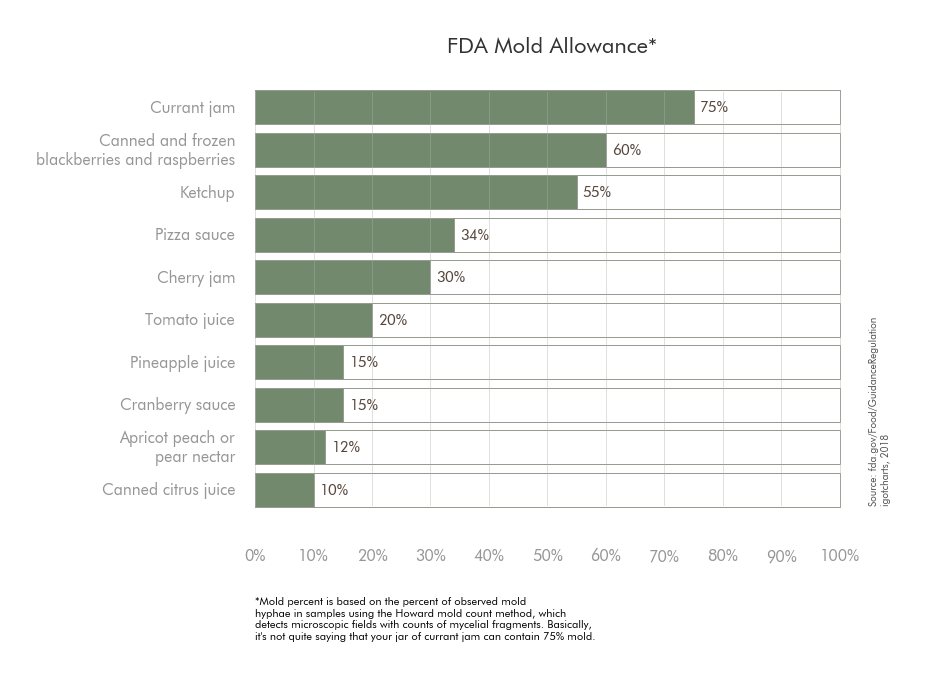

In [357]:
bars = charts_function_list.chart_maker(title = 'FDA Mold Allowance*',title_size=22)
fig = bars.initial_fig_axis()
fig.subplots_adjust(top=.92)
ax = fig.add_subplot(111)
ax.barh(list(mold.index),[1 for x in range(len(mold.index))],color='',edgecolor='#969C8E')
ax.barh(list(mold.index),mold['Allowance'].values,color='#72896E' ,edgecolor= '#969C8E')
bars.tick_params_(ax=ax,pad=20)

xticks = ax.set_xticks(np.arange(0,1.1,.1))
xtick_labels = ax.set_xticklabels([str(int(x*100))+"%" for x in ax.get_xticks()])


ax.set_yticks(mold.index)
ytick_labels = ax.set_yticklabels(mold['Food'],ha='right',va='center')
ax.grid(alpha=.5,axis='x',ydata=[.05,.95],)
ax.grid(alpha=0,axis='y')
for i,percent, in enumerate(mold['Allowance']):
    ax.text(percent+.01,i,str(int(percent*100))+'%',fontsize=15,va='center',color='#56463C')
ax.text(0,-.15,'*Mold percent is based on the percent of observed mold\nhyphae in samples using the Howard mold count method, which \ndetects microscopic fields with counts of mycelial fragments. Basically,\nit\'s not quite saying that your jar of currant jam can contain 75% mold.',transform=ax.transAxes,fontsize=11,va='top')
ax.text(1,.05,'Source: fda.gov/Food/GuidanceRegulation\nigotcharts, 2018',transform=ax.transAxes,rotation=90,va='bottom',alpha=.7)
os.chdir(outputs)
charts_function_list.chart_save('FDA Mold Allowance')